In [1]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph, END
import random

In [ ]:
class AgentState(TypedDict):
    name:str
    number: List[int]
    counter: int

def greeting_node(state: AgentState) -> AgentState:
    """Greeting node with says hi to the person"""

    state["name"] = f"Hi there, {state["name"]}"
    state["counter"] = 0

    return state

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 0 - 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1

    return state

def should_continue(state: AgentState) -> AgentState:
    "Function to decide what to do next"

    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"
    else:
        return "exit"


In [6]:
graph = StateGraph(AgentState)

graph.add_node("greetings", greeting_node)
graph.add_node("add_random", random_node)

graph.add_edge("greetings", "add_random")
graph.add_conditional_edges(
    "add_random",
    should_continue,
    {
        "loop": "add_random",
        "exit": END
    }
)

graph.set_entry_point("greetings")

app = graph.compile()

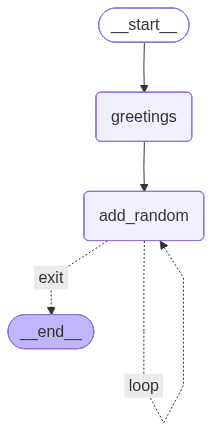

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
app.invoke({"name": "Bernard", "number": [], "counter": -1})

KeyError: 'nae'